In [16]:
from fastai.vision.all import *
set_seed(0)

## Train the Model

In [17]:
path = untar_data("https://students.cs.calvin.edu/~bel3/344/hw1/images.zip")
image_files = get_image_files(path).sorted()
def a_b_or_c(filename):
    if filename[0]=='A':
        return 'A'
    elif filename[0]=='B':
        return 'B'
    else:
        return 'C'

labels = []
for image in image_files:
    labels.append(a_b_or_c(image.name))    

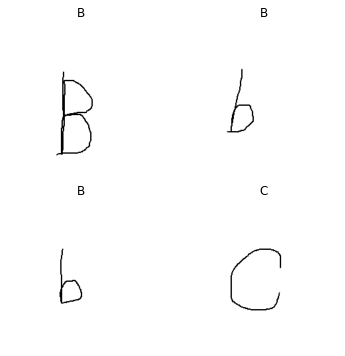

In [18]:
dataloaders = ImageDataLoaders.from_lists(
    path=path, fnames=image_files, labels=labels,
    valid_pct=0.2,
    seed=42,
    bs=4,
    item_tfms=Resize(224)
)

dataloaders.show_batch()

In [19]:
dataloaders.train.n

80

In [20]:
sizes_of_images_in_batch = [image_batch.shape[0] for image_batch, label_batch in dataloaders.train]
print(f'{len(image_files)} total images: {dataloaders.train.n} in train set, {dataloaders.valid.n} in valid set')
print(f'Training data loader gave us {len(sizes_of_images_in_batch)} batches in an epoch')
print(f'Each batch had {set(sizes_of_images_in_batch)} images.')
print(f'So the learner will get trained on a total of {sum(sizes_of_images_in_batch)} images.')

100 total images: 80 in train set, 20 in valid set
Training data loader gave us 20 batches in an epoch
Each batch had {4} images.
So the learner will get trained on a total of 80 images.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.825753,1.208302,0.650000,0.350000,00:01


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.575947,1.582561,0.550000,0.450000,00:01
1,0.669791,1.339395,0.700000,0.300000,00:01
2,0.674800,0.596321,0.750000,0.250000,00:01
3,0.643806,0.503466,0.850000,0.150000,00:01
4,0.652180,0.344459,0.850000,0.150000,00:01
5,0.632820,0.321484,0.900000,0.100000,00:01
6,0.613066,0.503393,0.850000,0.150000,00:01
7,0.586673,0.231032,0.850000,0.150000,00:01
8,0.652556,0.246074,0.800000,0.200000,00:01
9,0.505919,0.223138,0.850000,0.150000,00:01


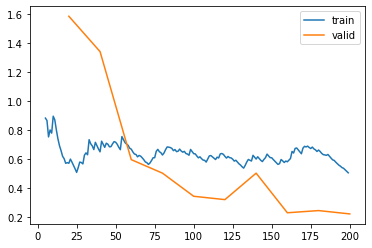

In [21]:
learn = vision_learner(
    dls=dataloaders,
    # arch=resnet34,
    arch=resnet18,
    metrics=[accuracy, error_rate]
)
learn.fine_tune(epochs=10)
learn.recorder.plot_loss()

## Load the Test Set

In [22]:
test_url = 'https://students.cs.calvin.edu/~ka37/letter_images_dataset_v0.zip'
test_dataset_path = untar_data(test_url)

In [23]:
test_images = get_image_files(test_dataset_path)
test_labels = [img.parent.name.upper() for img in test_images]
test_images

(#944) [Path('/scratch/cs344/data/letter_images_dataset_v0/a/group_4_A_18.png'),Path('/scratch/cs344/data/letter_images_dataset_v0/a/group_9_upper_a_0.png'),Path('/scratch/cs344/data/letter_images_dataset_v0/a/group_6_A (25).png'),Path('/scratch/cs344/data/letter_images_dataset_v0/a/group_8_a32.png'),Path('/scratch/cs344/data/letter_images_dataset_v0/a/group_1_A_6.png'),Path('/scratch/cs344/data/letter_images_dataset_v0/a/group_4_A_6.png'),Path('/scratch/cs344/data/letter_images_dataset_v0/a/group_3_A_27.png'),Path('/scratch/cs344/data/letter_images_dataset_v0/a/group_5_a14.jpg'),Path('/scratch/cs344/data/letter_images_dataset_v0/a/group_4_A_9.png'),Path('/scratch/cs344/data/letter_images_dataset_v0/a/group_5_a5.jpg')...]

In [24]:
test_dl = dataloaders.test_dl(list(zip(test_images, test_labels)), with_labels=True)

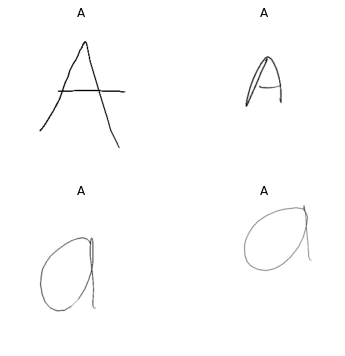

In [25]:
test_dl.show_batch()

## Evaluate the learner on the testing data

In [26]:
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)

In [27]:
interp.print_classification_report()

              precision    recall  f1-score   support

           A       0.77      0.71      0.74       332
           B       0.83      0.63      0.72       346
           C       0.62      0.88      0.72       266

    accuracy                           0.73       944
   macro avg       0.74      0.74      0.73       944
weighted avg       0.75      0.73      0.73       944



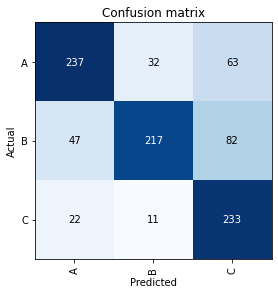

In [28]:
interp.plot_confusion_matrix()

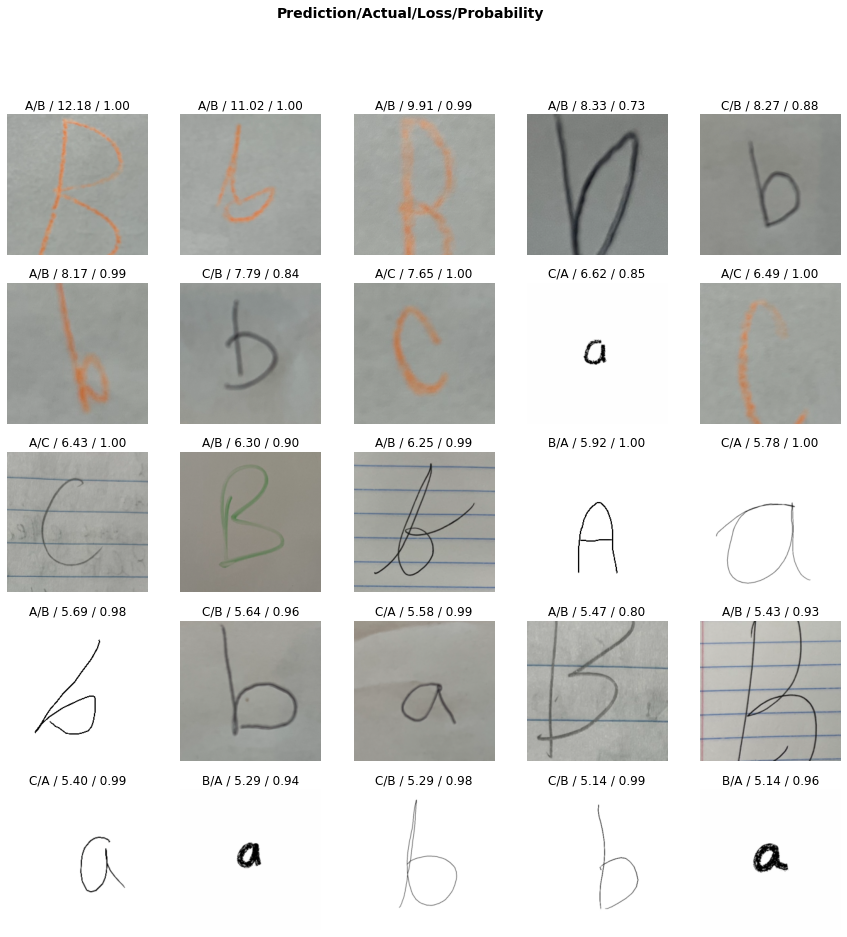

In [29]:
interp.plot_top_losses(25)

In [30]:
predicted_probs, targets = learn.get_preds(dl=test_dl, with_preds=True, with_targs=True)
predicted_classes = predicted_probs.argmax(axis=1)
accuracy(predicted_probs, targets)

TensorBase(0.7278)

## Answers

1. The accuracy of my classifier on the test images was 0.7278.
2. According to the confusion matrix, the most common mistake was predicting that a B was a C, with 82 of these mistakes recorded. Looking at the top losses, a similar trend is shown, with lowercase c's and b's often getting confused. The classifier also does not seem to do well with images that are hand-drawn in different colors.
3. For homework 1 I predicted that my model would get 70-80% accuracy, so the results are around what I expected.
4. 
**What are known limits to this dataset’s representativeness?**
After running the classifier on the test set of images, it seems that the biggest limit of the training data's representativeness is that it does not account for hand-drawn letters, or any letters written outside of the program provided. This means that the classifier is expected to be less accurate on letters of these forms.

**What are the contents of this dataset? Please include enough detail that someone unfamiliar
with the dataset who might want to use it can understand what is in the dataset.**
The training dataset includes only 100 images that each represent a letter, a b or c, both in uppercase and lowercase. These letters were drawn using a drawing tool provided in class, and not using any methods beyond this. Because of these limits, the results on the test images reflect a limited understanding of handwritten or colorfully drawn letters, leading to a lower accuracy.

5. I decided to change from resnet18 to resnet34, and I was surprised that the accuracy didn't change much during training, but went up during the test from 0.7278 to 0.8105. the top loss function also returned all hand-drawn images this time instead of a mix, and the mistakes for c's and b's were much lower.